<a href="https://colab.research.google.com/github/AkshataKishore/IML/blob/master/PCOS_ML_Linear_Explainer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount("/content/drive")
# After executing the cell above, Drive
# files will be present in "/content/drive/My Drive".
!ls "/content/drive/My Drive"
%cd /content/drive/My Drive/

In [16]:
import time,os,json
import numpy as np
import pandas as pd
import seaborn as sns
from tqdm import tqdm_notebook as tqdm
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np

from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.ensemble import RandomForestRegressor

import pickle

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.style.use('ggplot') # random state
SEED=100
time_start_notebook = time.time()
home = os.path.expanduser('~')
[(x.__name__,x.__version__) for x in [np,pd,sns]]
import pandas as pd 
df = pd.read_csv('cleaned_data.csv')
X = df.drop(columns=["Cycle length(days)"])

y = df["Cycle length(days)"].values
# implementing train-test-split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=23)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [8]:
# a simple linear model
! pip install shap 
import shap
import sklearn
model = sklearn.linear_model.LinearRegression()
model.fit(X_train, y_train)

     |████████████████████████████████| 327kB 2.8MB/s 
  Created wheel for shap: filename=shap-0.36.0-cp36-cp36m-linux_x86_64.whl size=456459 sha256=9cdeff28ca488de09804457d98a15d29212f4484a4c66b6f2cf2c95f87f020f6
  Stored in directory: /root/.cache/pip/wheels/fb/15/e1/8f61106790da27e0765aaa6e664550ca2c50ea339099e799f4
Successfully built shap


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [9]:
print("Model coefficients:\n")
for i in range(X.shape[1]):
    print(X.columns[i], "=", model.coef_[i].round(4))

Model coefficients:

PCOS (Y/N) = -0.0403
 Age (yrs) = -0.0127
Weight (Kg) = 0.4622
Height(Cm)  = -0.1403
BMI = -0.2967
Blood Group = -0.0672
Pulse rate(bpm)  = -0.0504
RR (breaths/min) = 0.0222
Hb(g/dl) = -0.0866
Cycle(R/I) = -0.2028
Marraige Status (Yrs) = 0.148
Pregnant(Y/N) = 0.0599
No. of aborptions = -0.0114
FSH(mIU/mL) = 0.008
LH(mIU/mL) = -0.1349
Hip(inch) = 0.37
Waist(inch) = -0.3943
TSH (mIU/L) = -0.0463
AMH(ng/mL) = 0.058
PRL(ng/mL) = 0.0577
Vit D3 (ng/mL) = 0.1163
PRG(ng/mL) = 0.0122
RBS(mg/dl) = 0.0484
Weight gain(Y/N) = -0.0969
hair growth(Y/N) = 0.1018
Skin darkening (Y/N) = 0.0514
Hair loss(Y/N) = 0.0408
Pimples(Y/N) = -0.0028
Fast food (Y/N) = 0.0128
Reg.Exercise(Y/N) = 0.0335
BP _Systolic (mmHg) = 0.0007
BP _Diastolic (mmHg) = -0.0615
Follicle No. (L) = 0.2162
Follicle No. (R) = -0.4326
Avg. F size (L) (mm) = -0.0761
Avg. F size (R) (mm) = 0.1284
Endometrium (mm) = -0.0456


Permutation explainer: 530it [01:13,  7.19it/s]


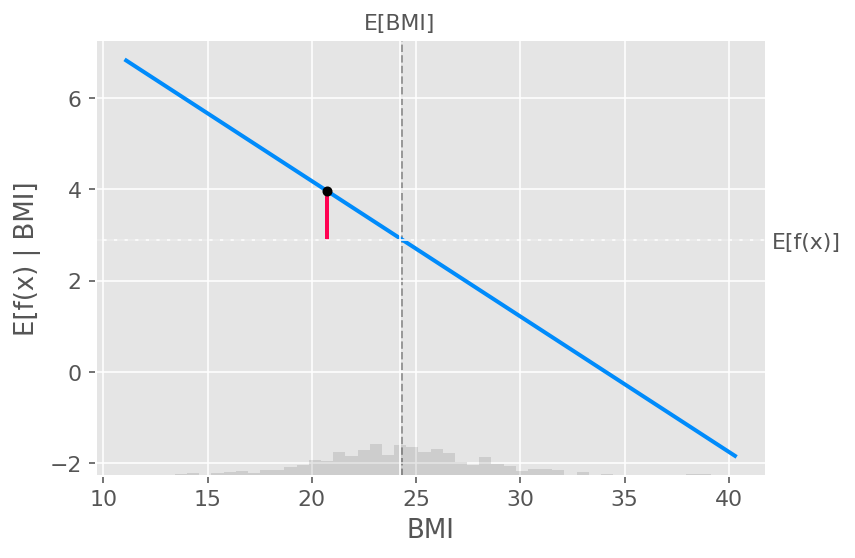

In [18]:
# compute the SHAP values for the linear model
background = shap.maskers.Independent(X, max_samples=1000)
explainer = shap.Explainer(model.predict, background)
shap_values = explainer(X)

# make a standard partial dependence plot
sample_ind = 18
fig,ax = shap.partial_dependence_plot(
    "BMI", model.predict, X, model_expected_value=True,
    feature_expected_value=True, show=False, ice=False,
    shap_values=shap_values[sample_ind:sample_ind+1,:],
    shap_value_features=X.iloc[sample_ind:sample_ind+1,:]
)

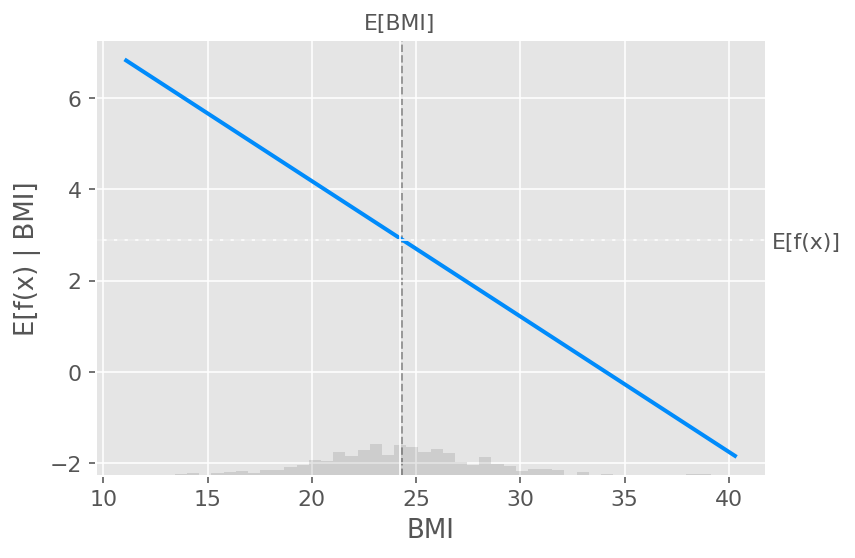

In [19]:
shap.plots.partial_dependence("BMI", model.predict, X, ice=False, model_expected_value=True, feature_expected_value=True)

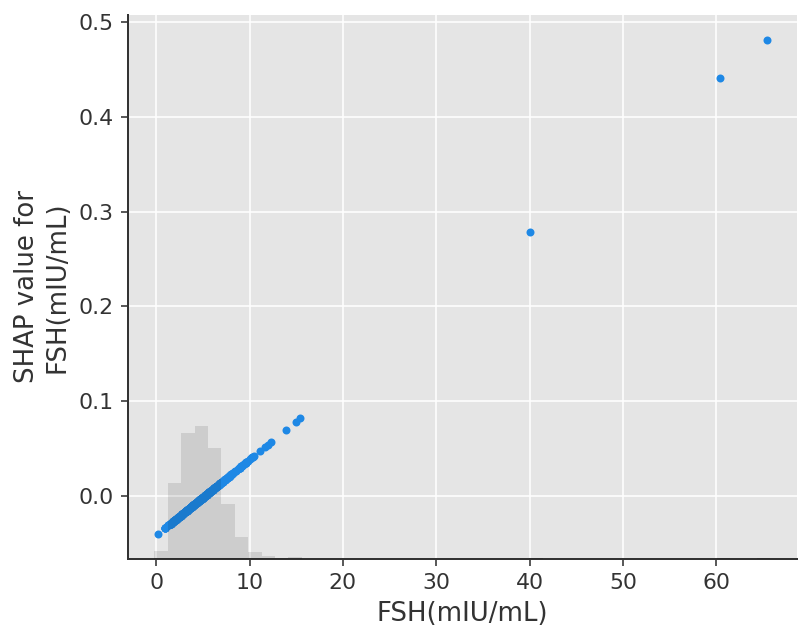

In [20]:
shap.plots.scatter(shap_values[:,"FSH(mIU/mL)"])

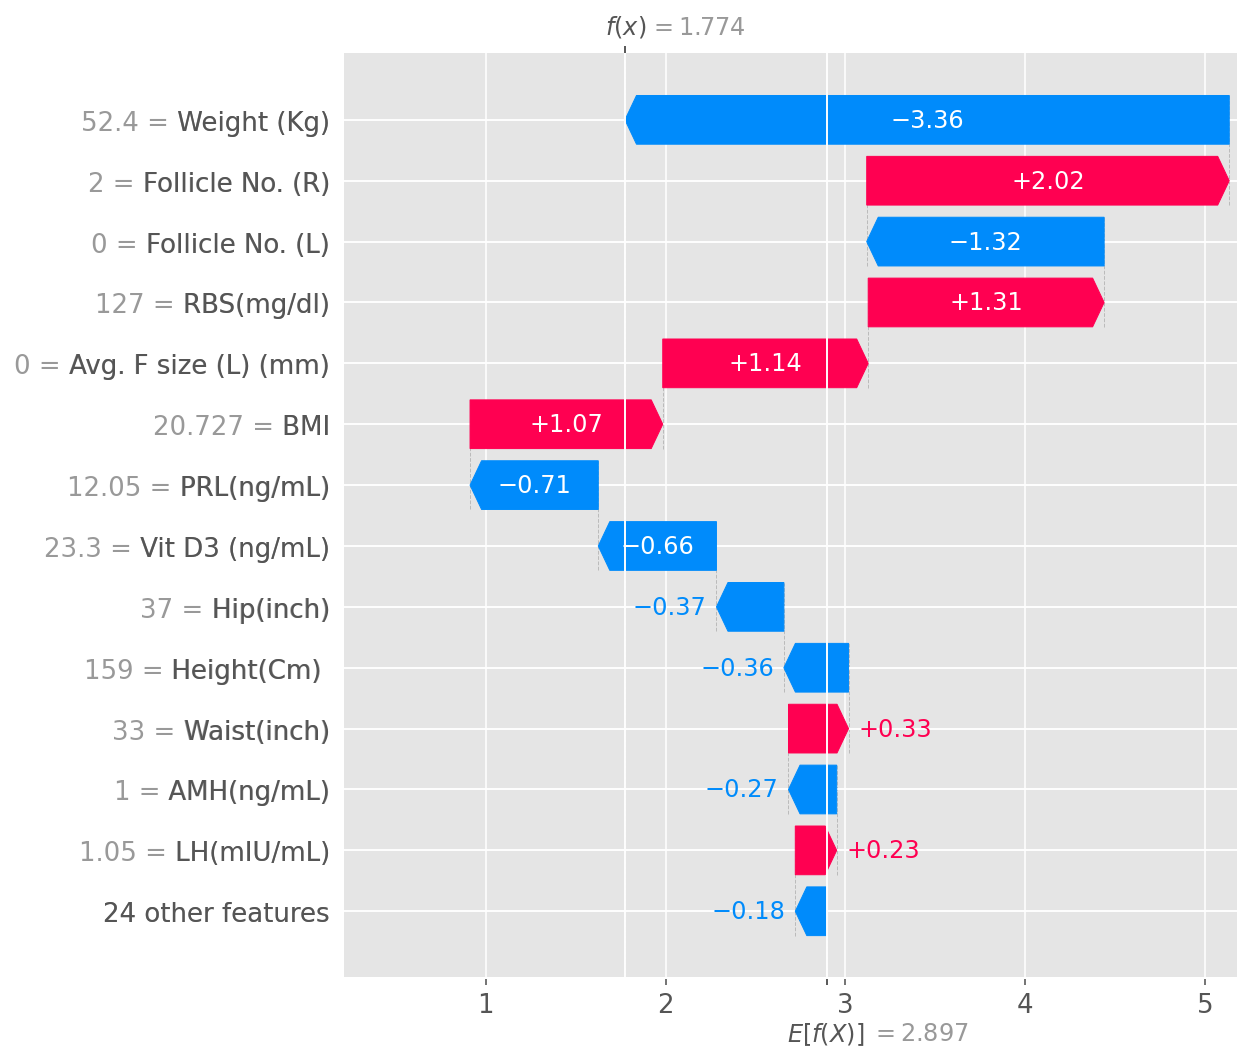

In [21]:
shap.plots.waterfall(shap_values[sample_ind], max_display=14)

In [23]:
# fit a GAM model to the data
! pip install interpret
import interpret.glassbox
model_ebm = interpret.glassbox.ExplainableBoostingRegressor()
model_ebm.fit(X, y)

# explain the GAM model with SHAP
explainer_ebm = shap.Explainer(model_ebm.predict, background)
shap_values_ebm = explainer_ebm(X)



     |████████████████████████████████| 5.2MB 2.6MB/s 
     |████████████████████████████████| 5.3MB 14.1MB/s 
     |████████████████████████████████| 3.6MB 45.9MB/s 
     |████████████████████████████████| 1.8MB 34.7MB/s 
     |████████████████████████████████| 81kB 7.9MB/s 
     |████████████████████████████████| 471kB 37.3MB/s 
     |████████████████████████████████| 276kB 38.6MB/s 
     |████████████████████████████████| 788kB 41.0MB/s 
     |████████████████████████████████| 122kB 16.4MB/s 
     |████████████████████████████████| 860kB 23.2MB/s 
     |████████████████████████████████| 51kB 3.8MB/s 
     |████████████████████████████████| 245kB 30.9MB/s 
     |████████████████████████████████| 1.0MB 29.9MB/s 
     |████████████████████████████████| 3.5MB 37.7MB/s 
     |████████████████████████████████| 194kB 40.4MB/s 
     |████████████████████████████████| 358kB 34.6MB/s 
     |████████████████████████████████| 358kB 38.1MB/s 
  Created wheel for dash-cytoscape: filename=dash_cyt

Permutation explainer: 530it [15:01,  1.70s/it]


ValueError: ignored

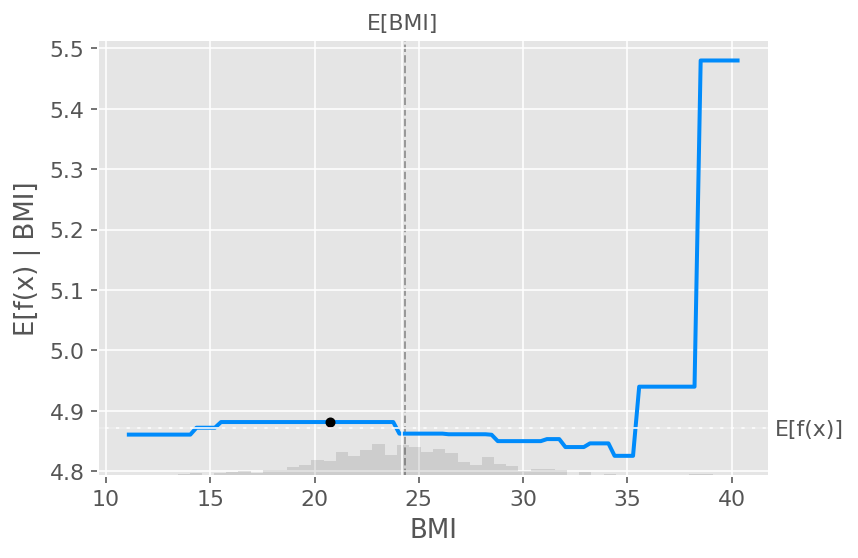

In [24]:
# make a standard partial dependence plot with a single SHAP value overlaid
fig,ax = shap.partial_dependence_plot(
    "BMI", model_ebm.predict, X, model_expected_value=True,
    feature_expected_value=True, show=False, ice=False,
    shap_values=shap_values_ebm[sample_ind:sample_ind+1,:],
    shap_value_features=X.iloc[sample_ind:sample_ind+1,:]
)

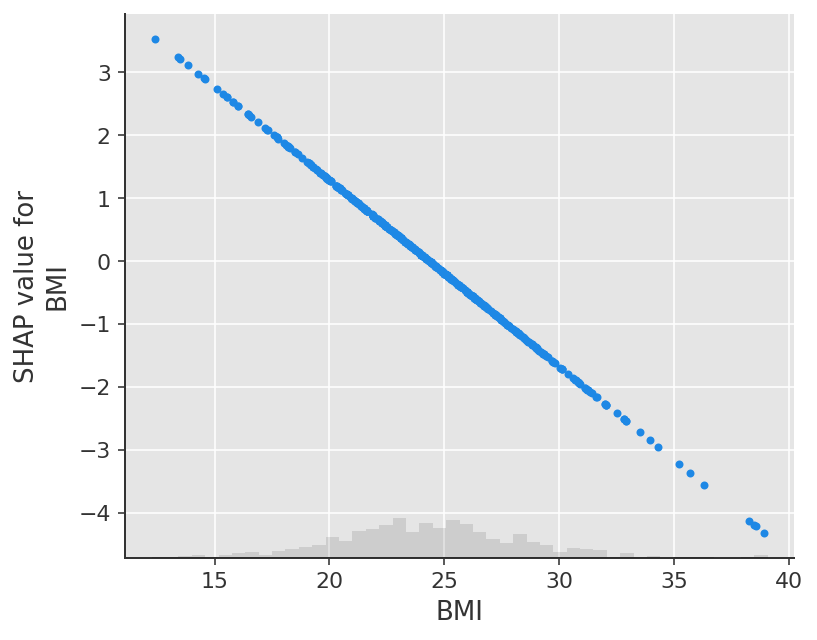

In [25]:
shap.plots.scatter(shap_values[:,"BMI"])

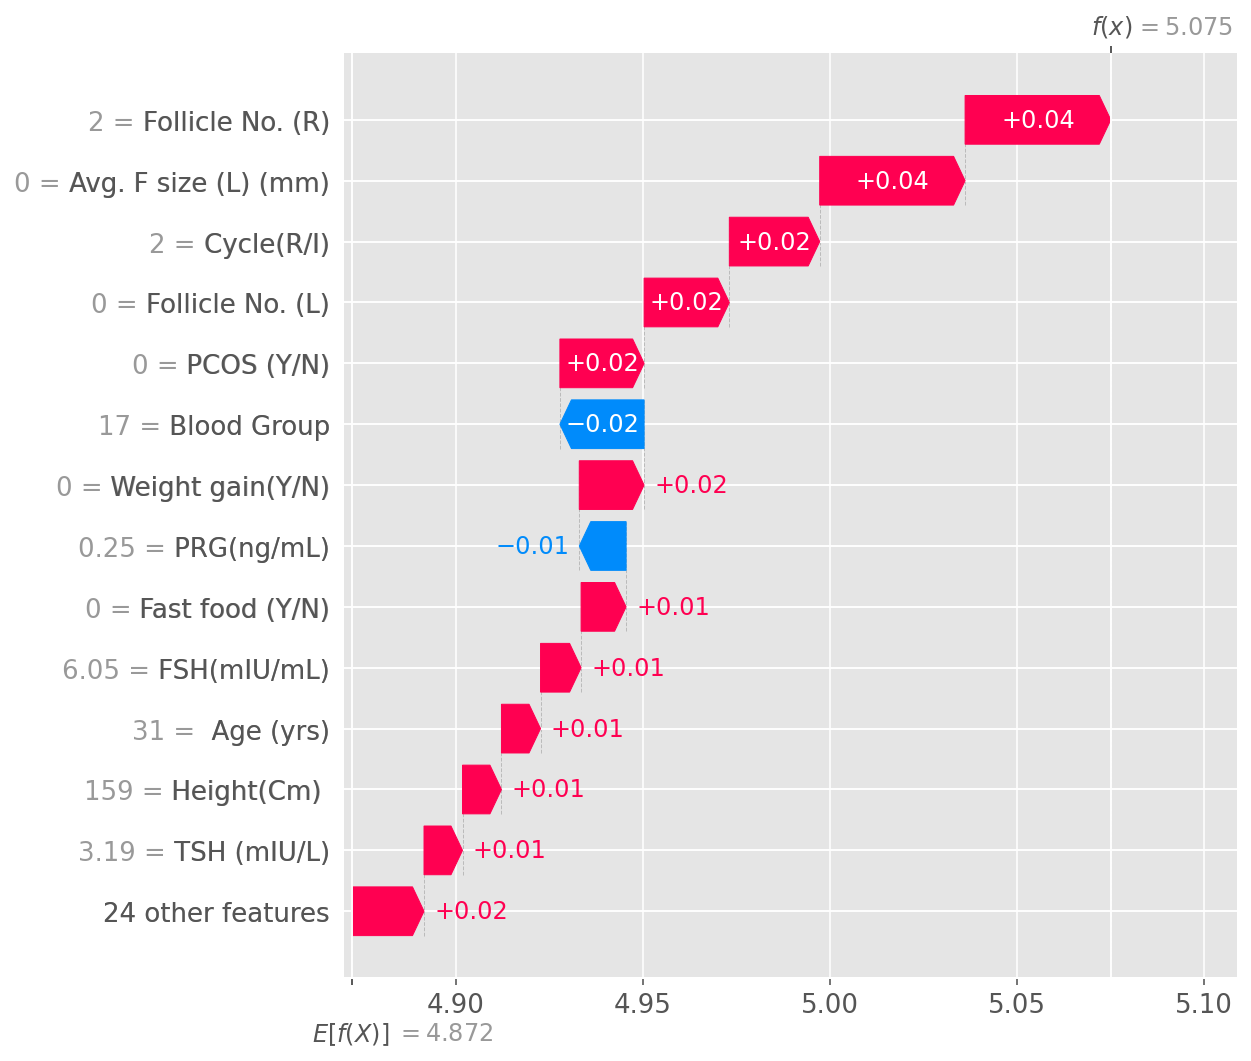

In [28]:
# the waterfall_plot shows how we get from explainer.expected_value to model.predict(X)[sample_ind]
shap.plots.waterfall(shap_values_ebm[sample_ind], max_display=14)

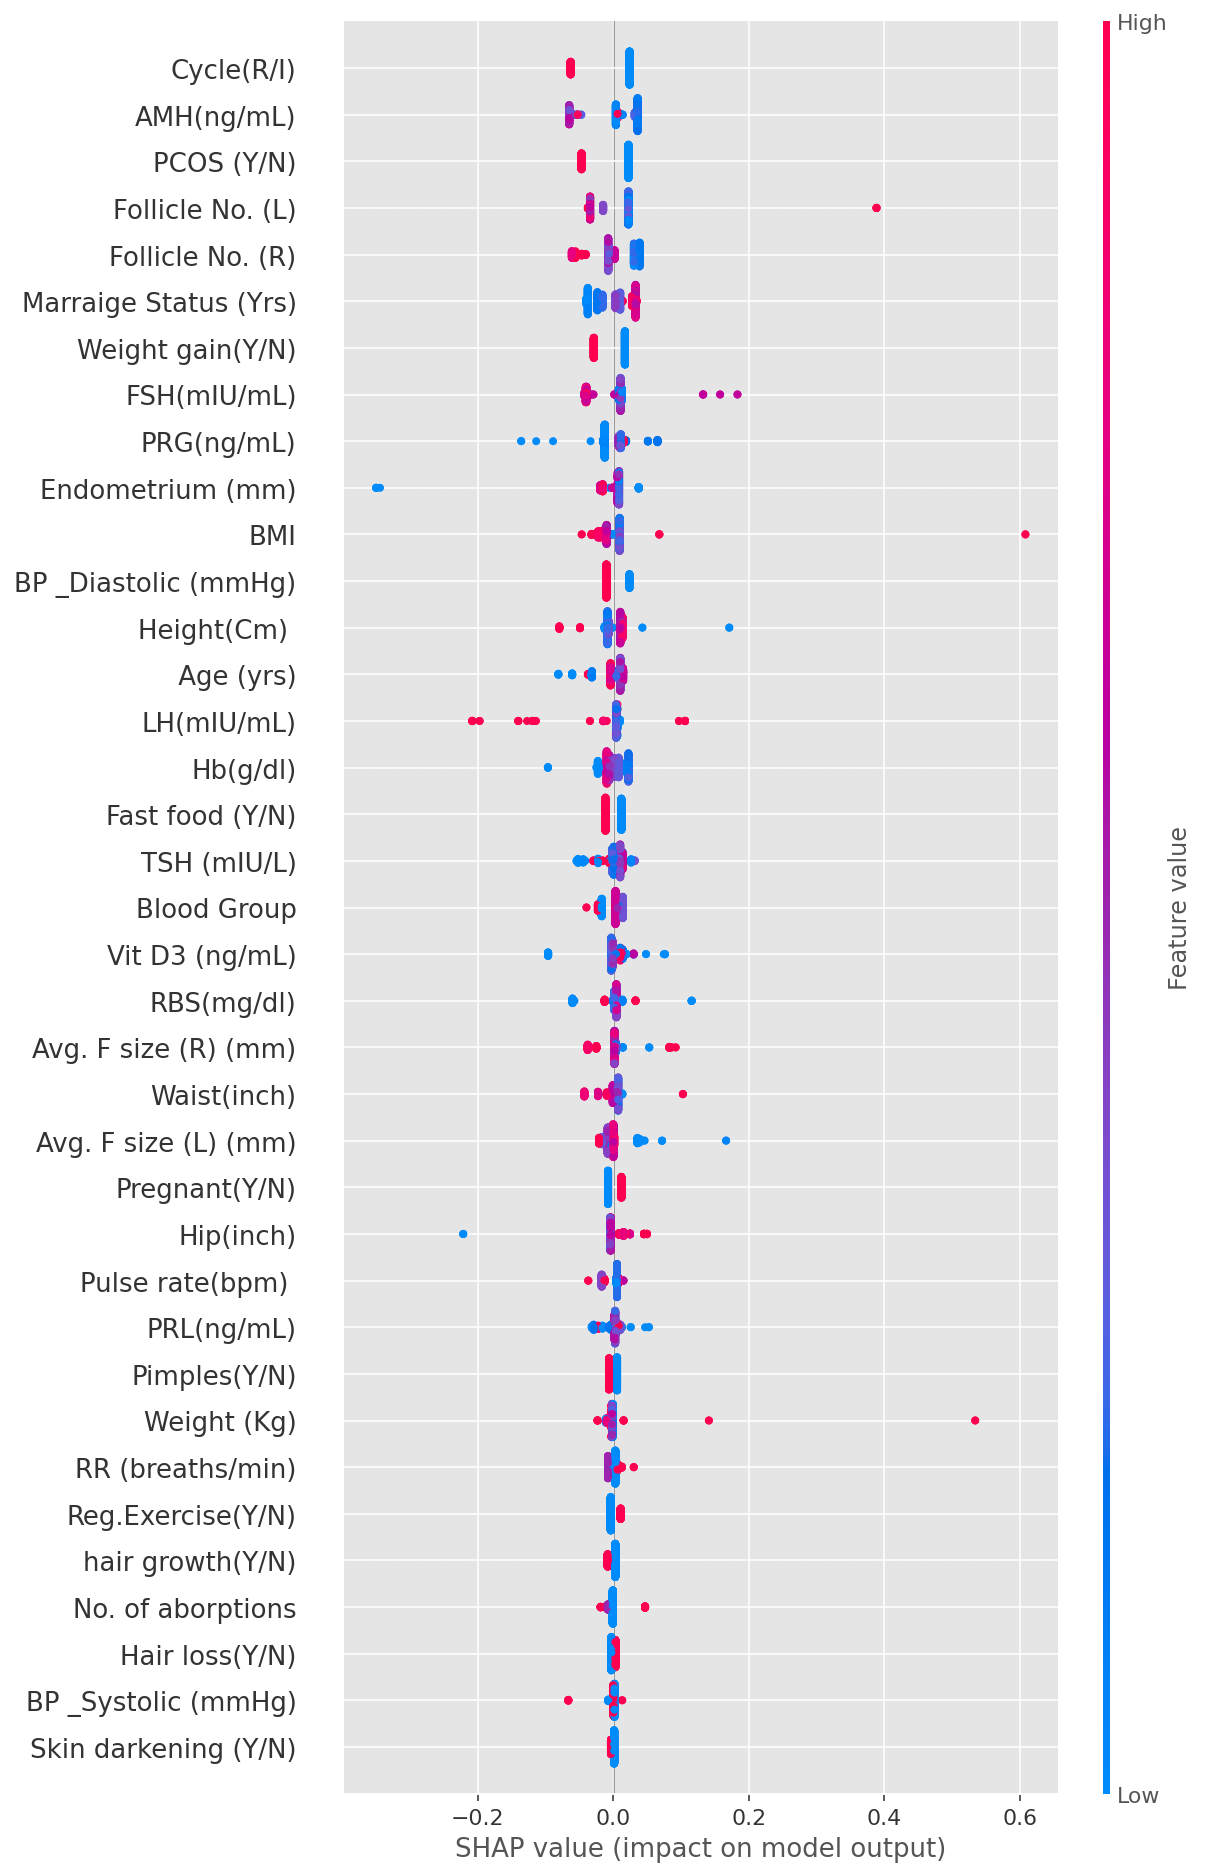

In [27]:
# the waterfall_plot shows how we get from explainer.expected_value to model.predict(X)[sample_ind]
shap.plots.beeswarm(shap_values_ebm, max_display=14)

[05:11:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


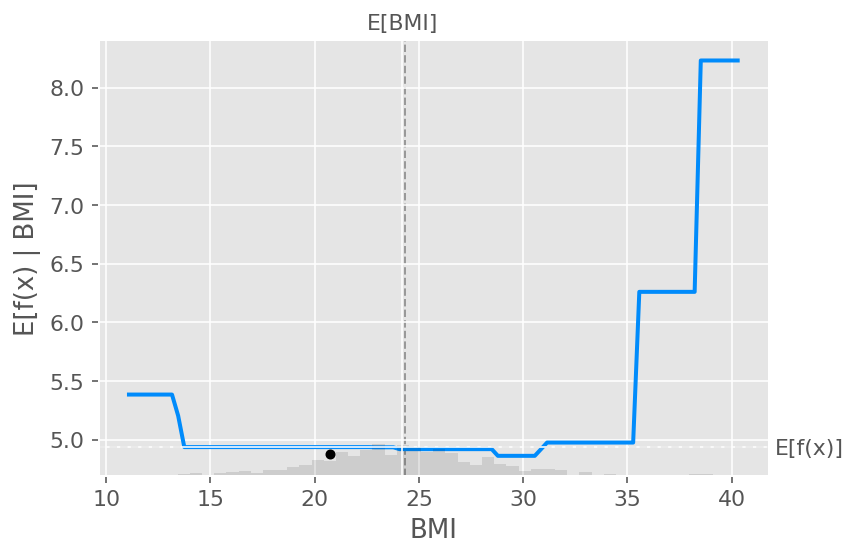

In [30]:
# train XGBoost model
import xgboost
model_xgb = xgboost.XGBRegressor(nestimators=100, max_depth=2).fit(X, y)

# explain the GAM model with SHAP
explainer_xgb = shap.Explainer(model_xgb, background)
shap_values_xgb = explainer_xgb(X)

# make a standard partial dependence plot with a single SHAP value overlaid
fig,ax = shap.partial_dependence_plot(
    "BMI", model_xgb.predict, X, model_expected_value=True,
    feature_expected_value=True, show=False, ice=False,
    shap_values=shap_values_ebm[sample_ind:sample_ind+1,:],
    shap_value_features=X.iloc[sample_ind:sample_ind+1,:]
)

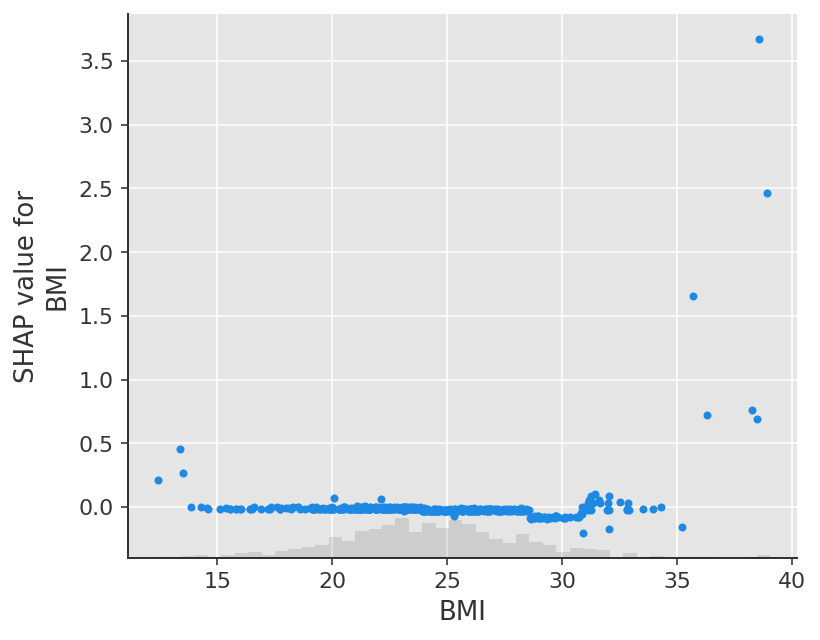

In [31]:
shap.plots.scatter(shap_values_xgb[:,"BMI"])

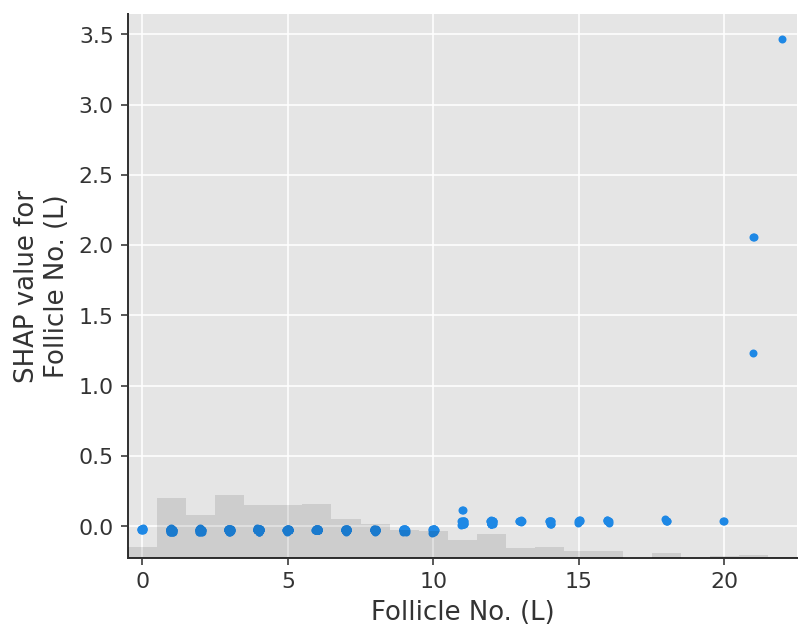

In [32]:
shap.plots.scatter(shap_values_xgb[:,"Follicle No. (L)"])

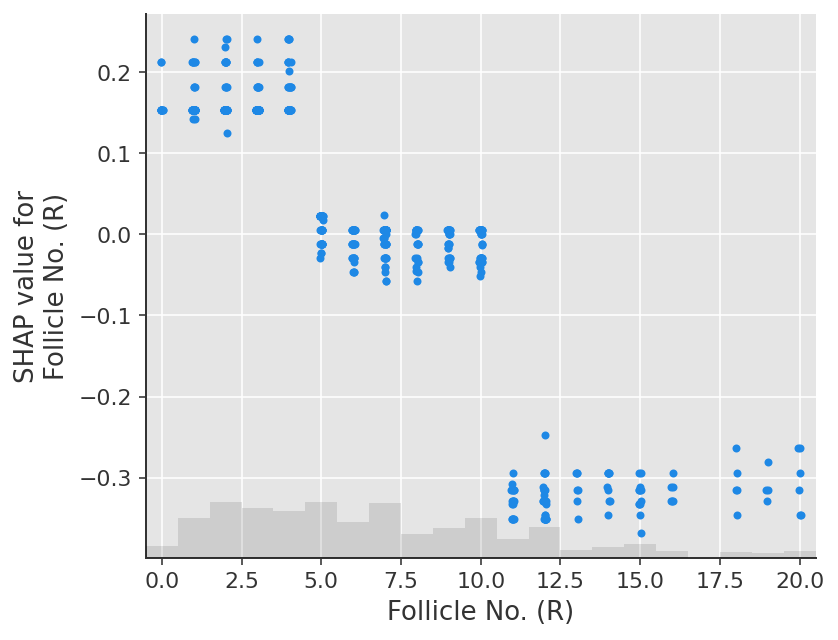

In [33]:
shap.plots.scatter(shap_values_xgb[:,"Follicle No. (R)"])

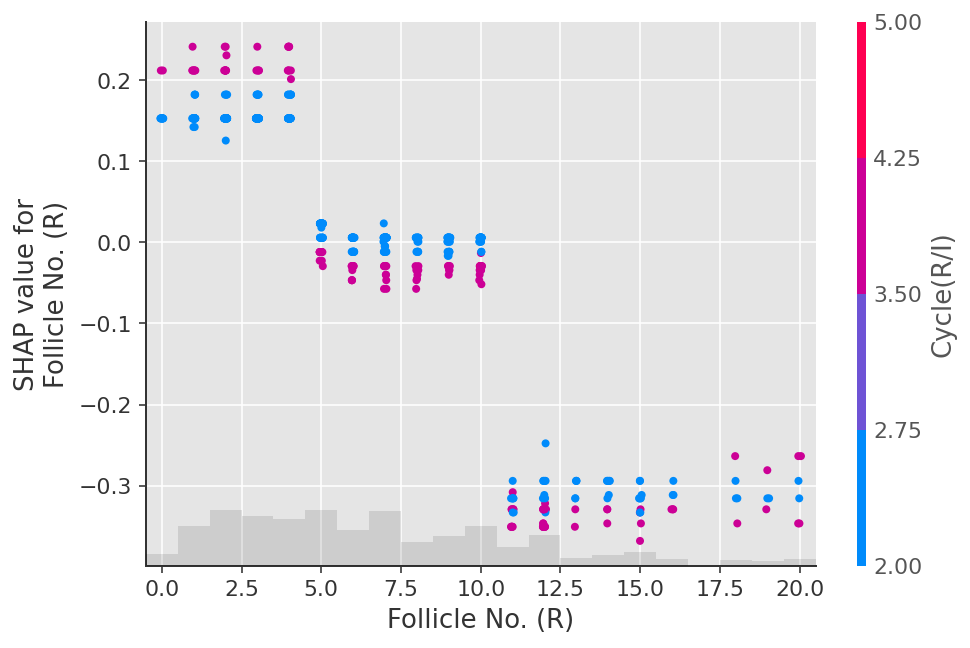

In [34]:
shap.plots.scatter(shap_values_xgb[:,"Follicle No. (R)"], color=shap_values)

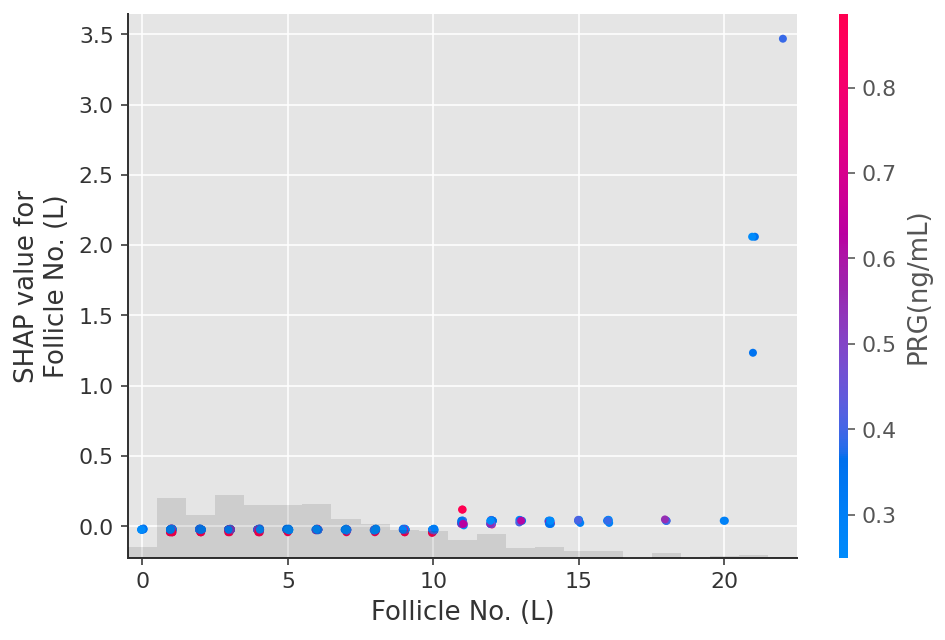

In [35]:
shap.plots.scatter(shap_values_xgb[:,"Follicle No. (L)"], color=shap_values)

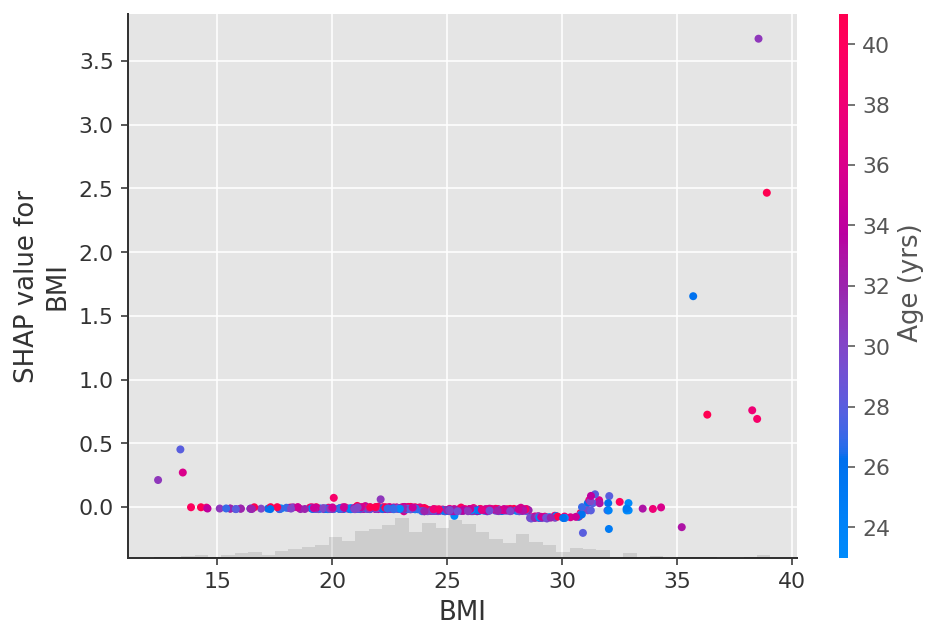

In [36]:
shap.plots.scatter(shap_values_xgb[:,"BMI"], color=shap_values)

In [50]:


# a simple linear logistic model
model_adult = sklearn.linear_model.LogisticRegression(max_iter=10000)
model_adult.fit(X, y)

def model_adult_proba(x):
    return model_adult.predict_proba(x)[:,1]
def model_adult_log_odds(x):
    p = model_adult.predict_log_proba(x)
    return p[:,1] - p[:,0]

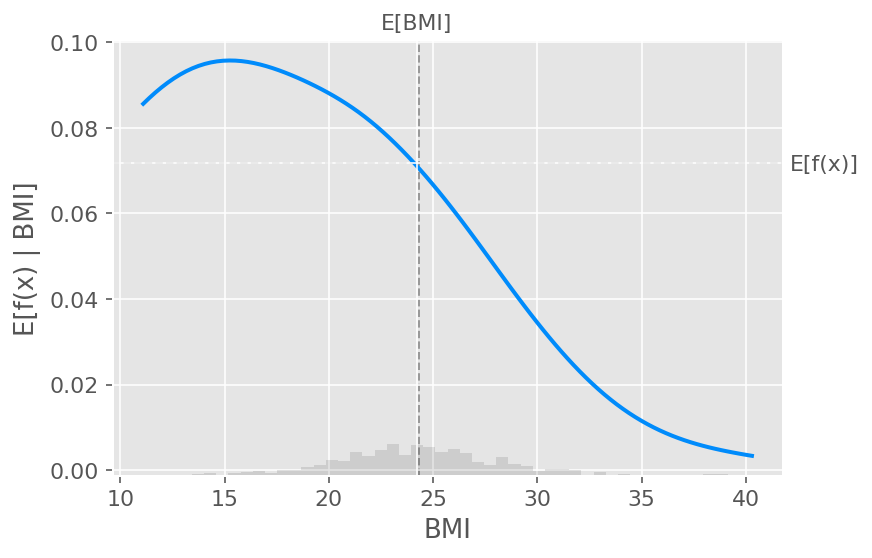

In [51]:
# make a standard partial dependence plot
sample_ind = 18
fig,ax = shap.partial_dependence_plot(
    "BMI", model_adult_proba, X, model_expected_value=True,
    feature_expected_value=True, show=False, ice=False
)


In [ ]:
# compute the SHAP values for the linear model
background_adult = shap.maskers.Independent(X, max_samples=1000)
explainer = shap.Explainer(model_adult_proba, background_adult)
shap_values_adult = explainer(X[:1000])

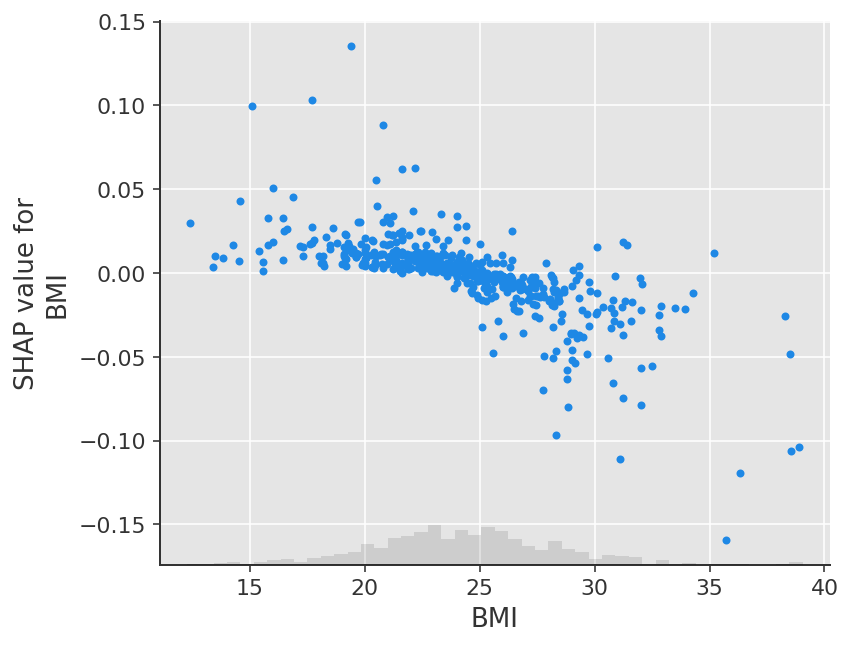

In [41]:
shap.plots.scatter(shap_values_adult[:,"BMI"])

In [42]:
# compute the SHAP values for the linear model
explainer_log_odds = shap.Explainer(model_adult_log_odds, background_adult)
shap_values_adult_log_odds = explainer_log_odds(X[:1000])

Permutation explainer: 530it [04:26,  1.99it/s]


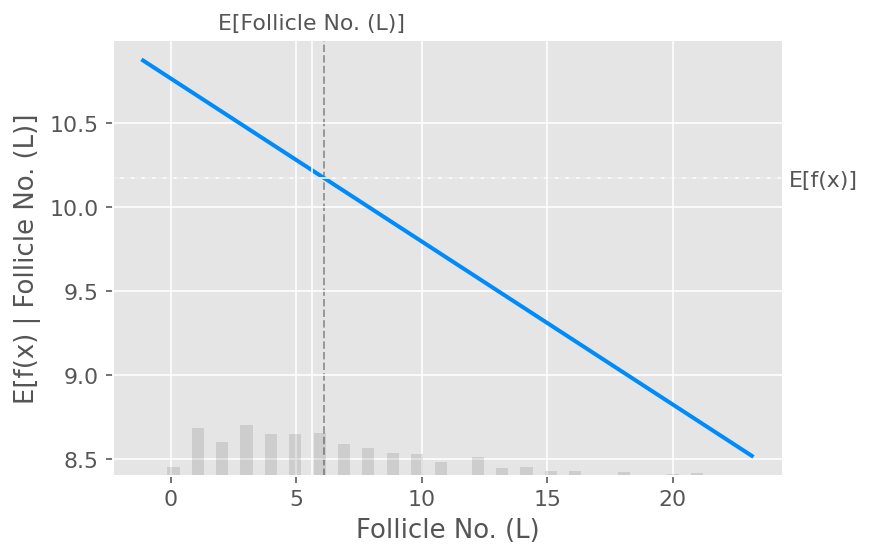

In [43]:
# make a standard partial dependence plot
sample_ind = 18
fig,ax = shap.partial_dependence_plot(
    "Follicle No. (L)", model_adult_log_odds, X, model_expected_value=True,
    feature_expected_value=True, show=False, ice=False,
    #shap_values=shap_values[sample_ind:sample_ind+1,:],
    #shap_value_features=X.iloc[sample_ind:sample_ind+1,:]
)

In [47]:
model = xgboost.XGBClassifier(nestimators=100, max_depth=2).fit(X, y)

# compute SHAP values
explainer = shap.Explainer(model, X)
shap_values = explainer(X)

# set a display version of the data to use for plotting (has string values)
shap_values.display_data = shap.datasets.df(display=True)[0].values

 99%|===================| 6291/6348 [00:59<00:00]       

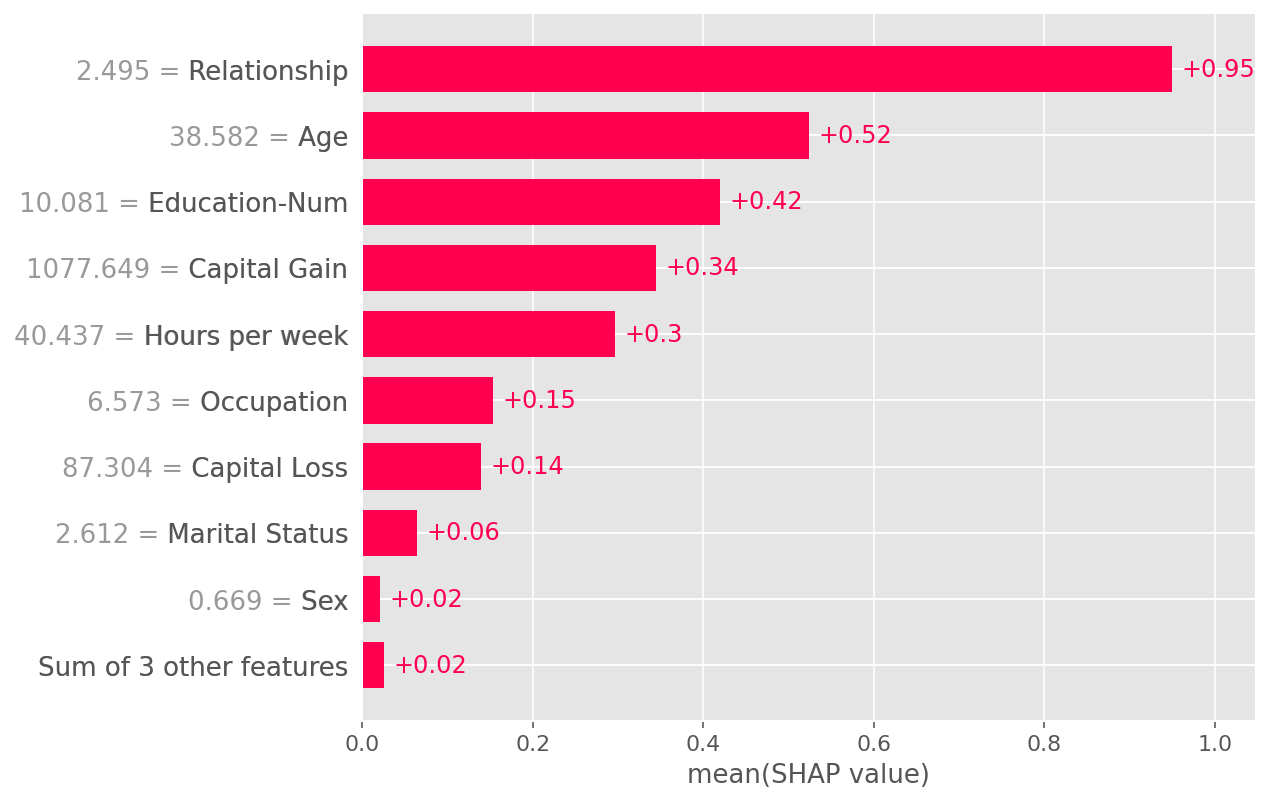

In [83]:
shap.plots.bar(shap_values)

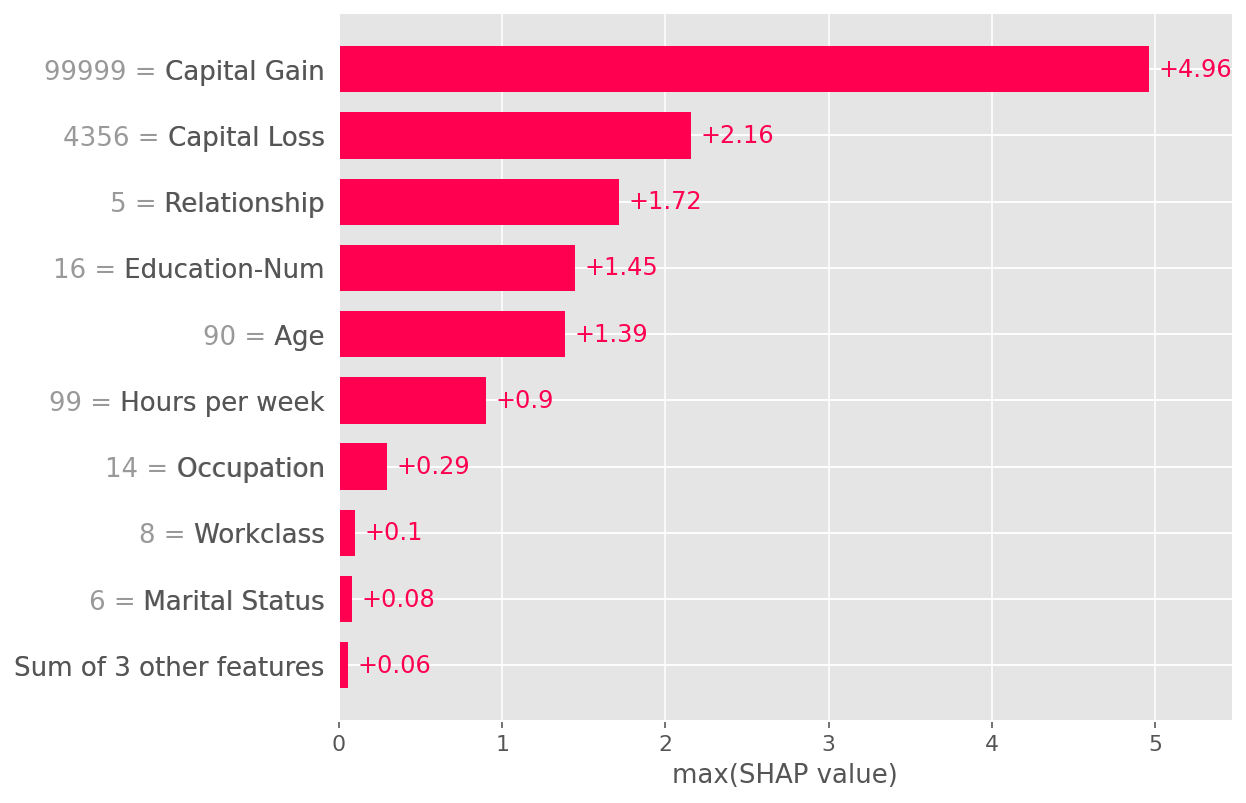

In [82]:
shap.plots.bar(shap_values.abs.max(0))

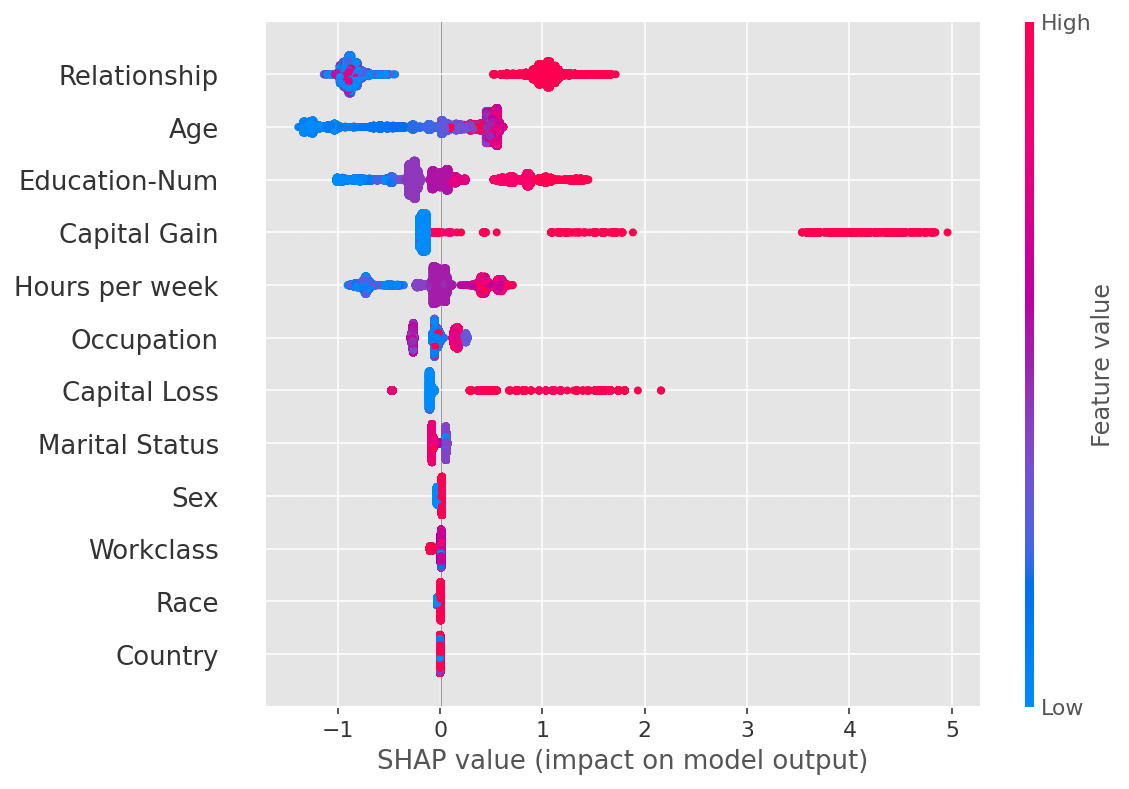

In [84]:
shap.plots.beeswarm(shap_values)

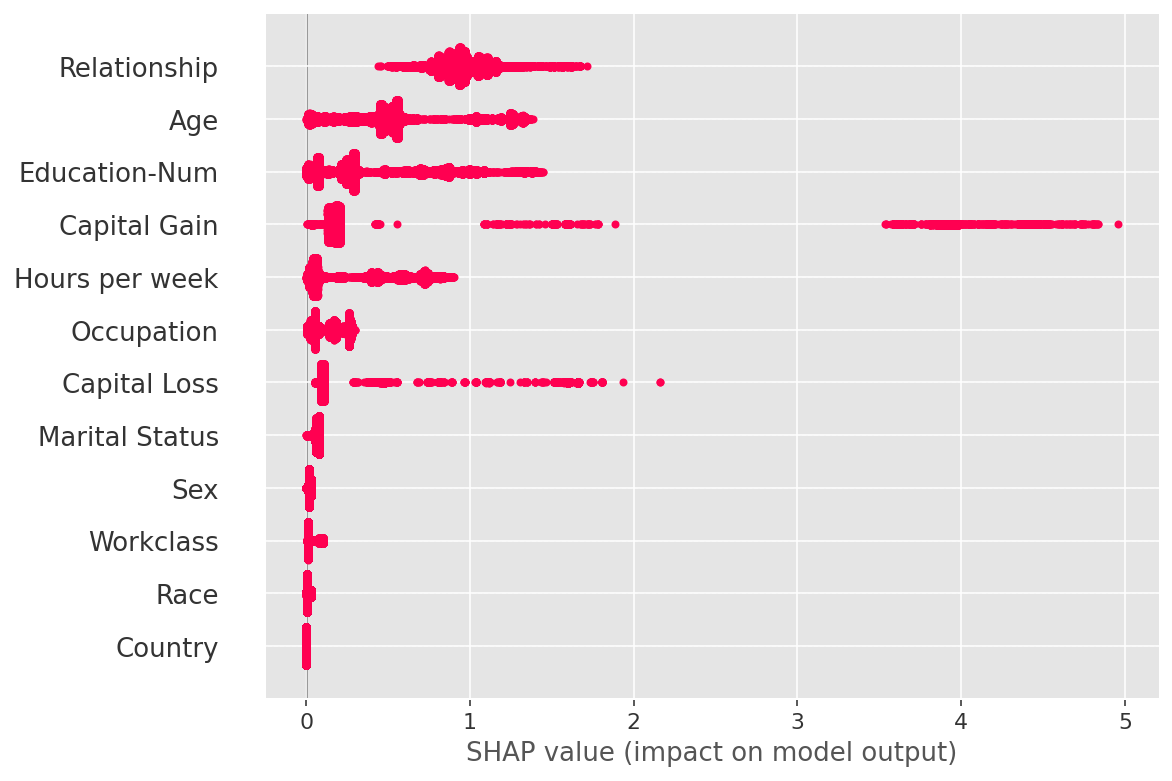

In [85]:
shap.plots.beeswarm(shap_values.abs, color="shap_red")

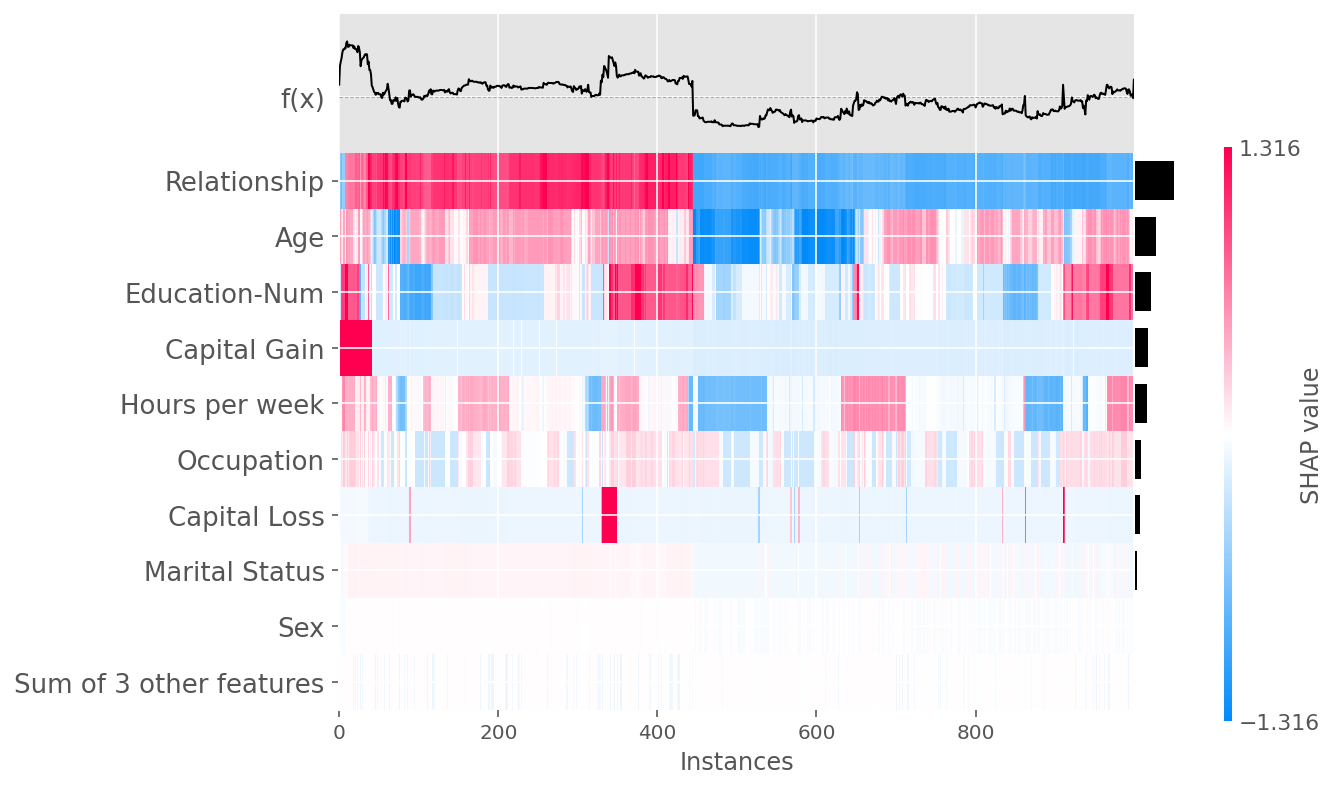

In [86]:
shap.plots.heatmap(shap_values[:1000])

In [75]:
df = pd.read_csv('cleaned_data.csv')
X = df.drop(columns=["Cycle length(days)"])

y = df["Cycle length(days)"].values

model = xgboost.XGBRegressor(n_estimators=100, subsample=0.3)
model.fit(X, y)

x = X.values[0:1,:]
refs = X.values[1:100] 

[05:39:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [76]:
import scipy as sp
D = sp.spatial.distance.pdist(X.fillna(X.mean()).T, metric="correlation")
cluster_matrix = sp.cluster.hierarchy.complete(D)

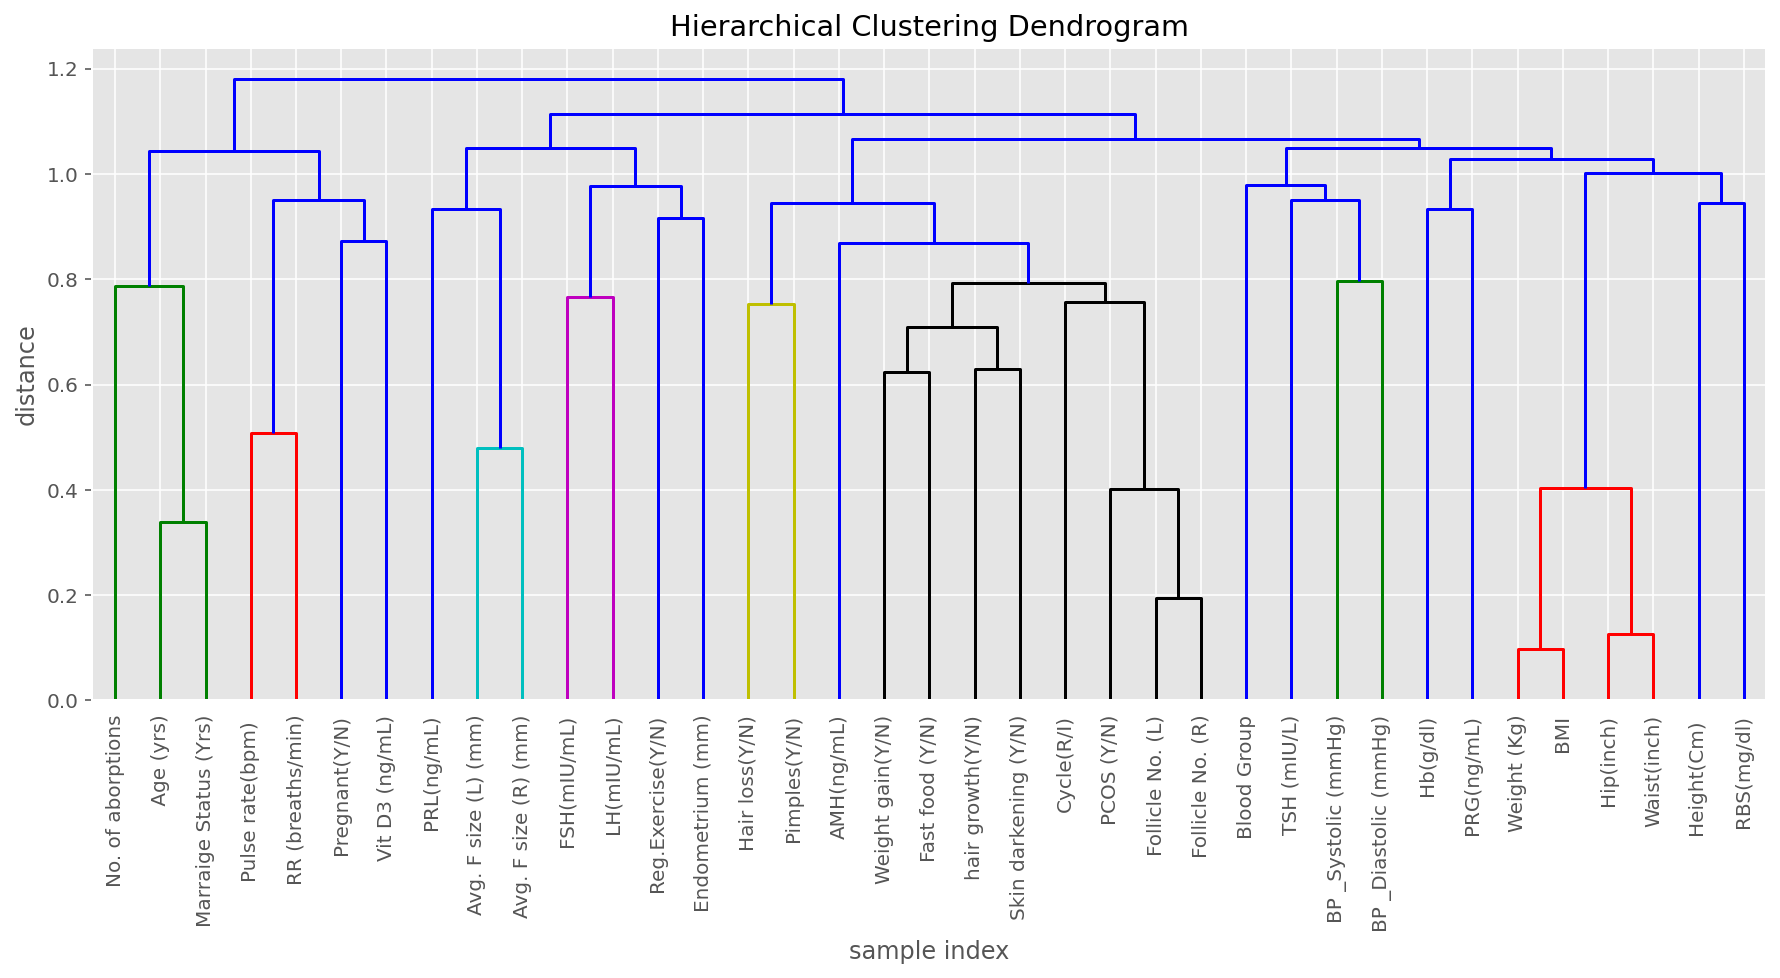

In [77]:
# plot the clustering
import numpy as np
import scipy as sp
import scipy.cluster
import matplotlib.pyplot as pl
import xgboost
import shap
import pandas as pd
pl.figure(figsize=(15, 6))
pl.title('Hierarchical Clustering Dendrogram')
pl.xlabel('sample index')
pl.ylabel('distance')
sp.cluster.hierarchy.dendrogram(
    cluster_matrix,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=10.,  # font size for the x axis labels
    labels=X.columns
)
pl.show()

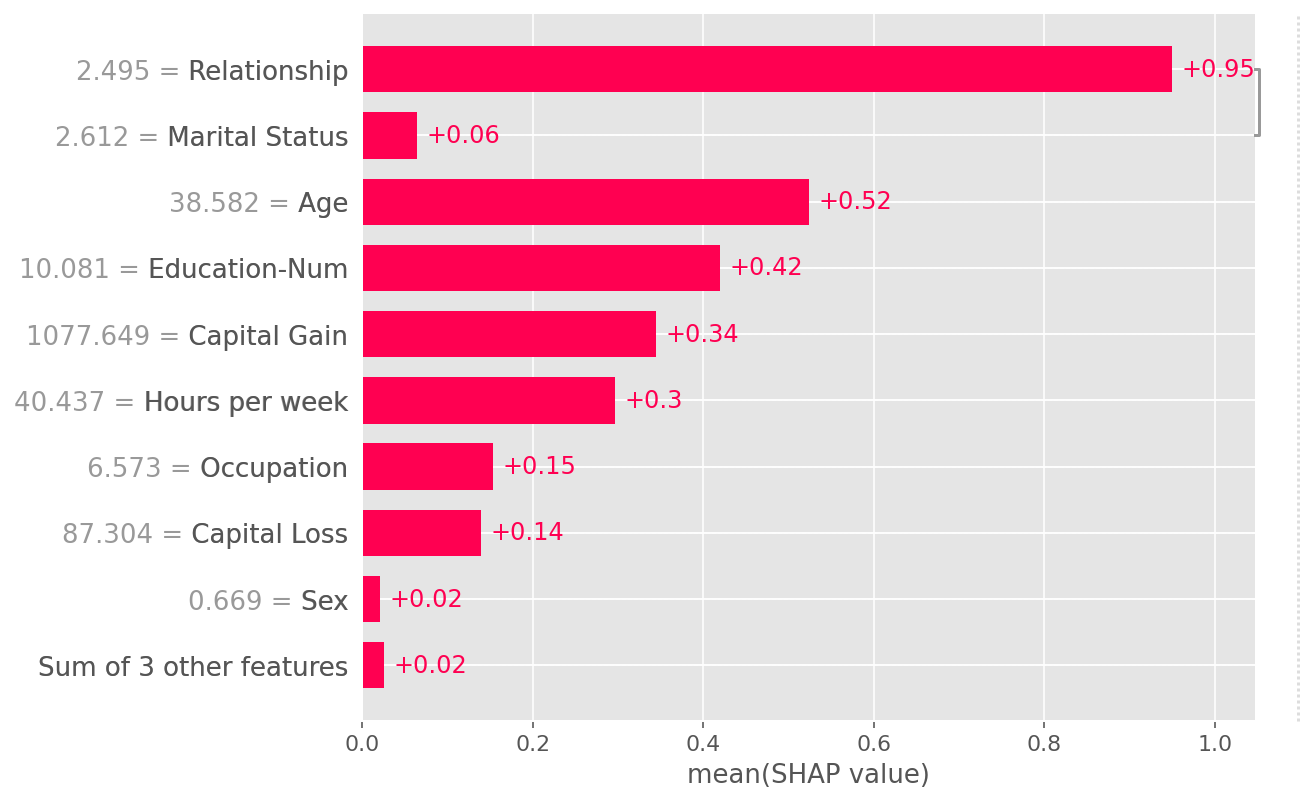

In [78]:
shap.plots.bar(shap_values, clustering=clustering)

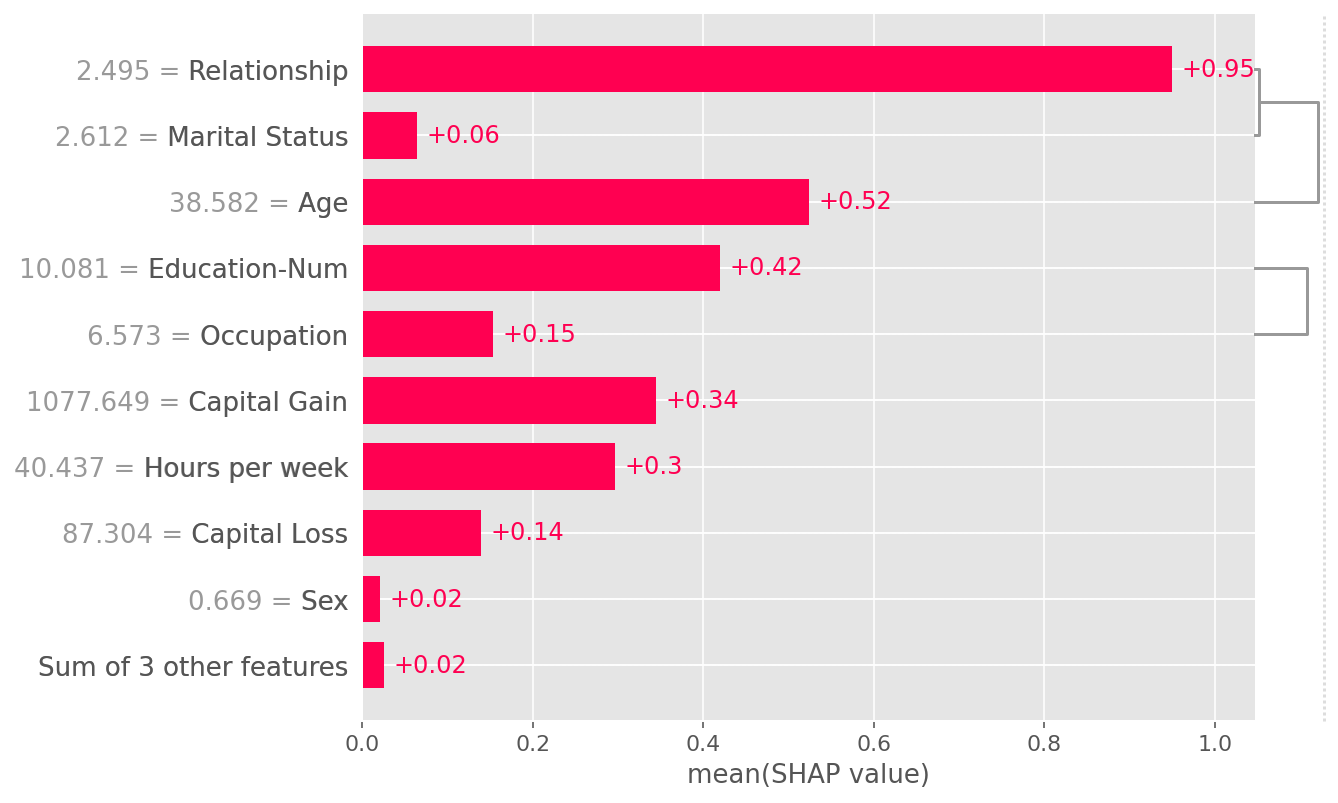

In [79]:
shap.plots.bar(shap_values, clustering=clustering, cluster_threshold=0.8)

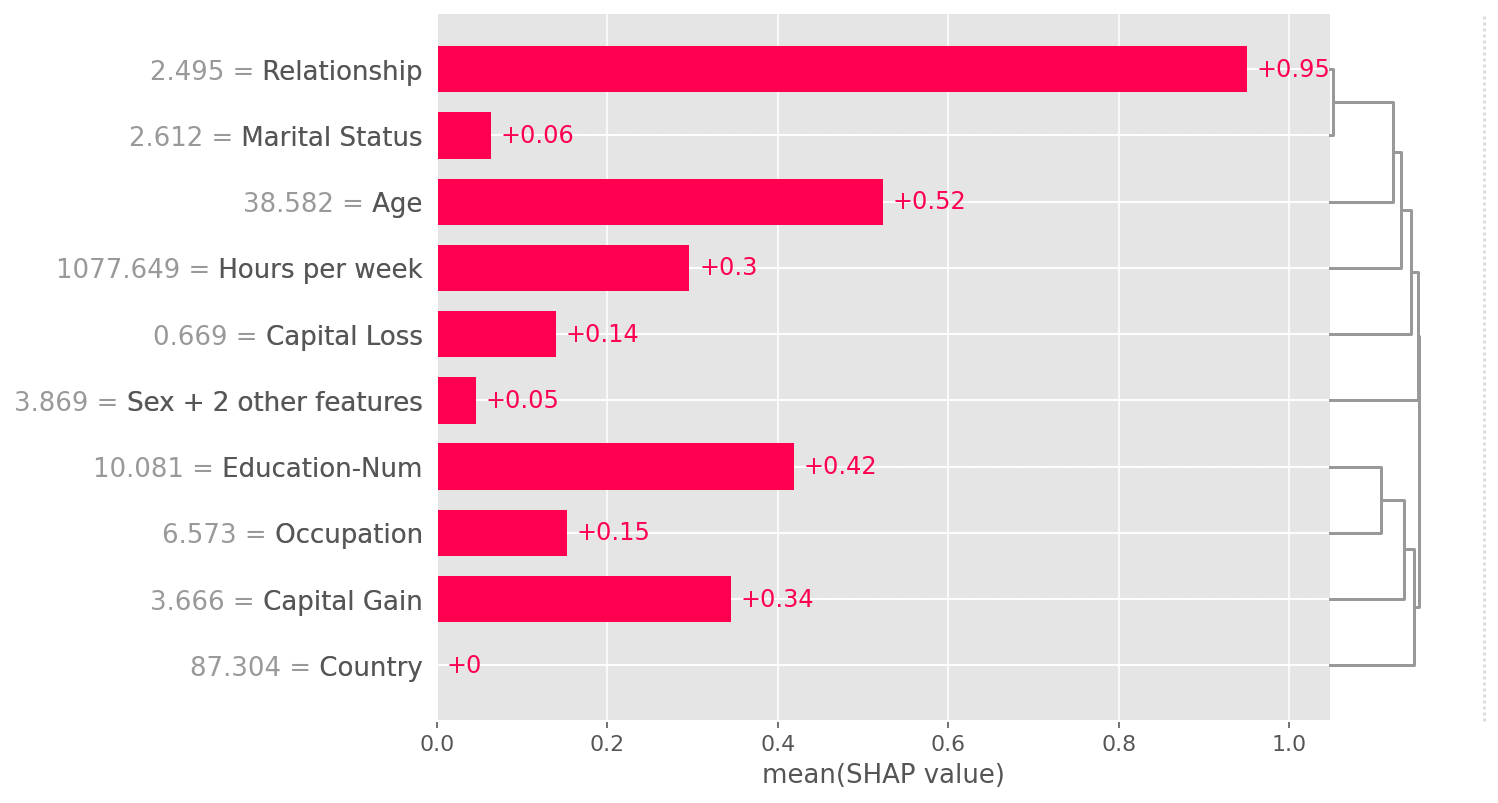

In [80]:
shap.plots.bar(shap_values, clustering=clustering, cluster_threshold=1.8)

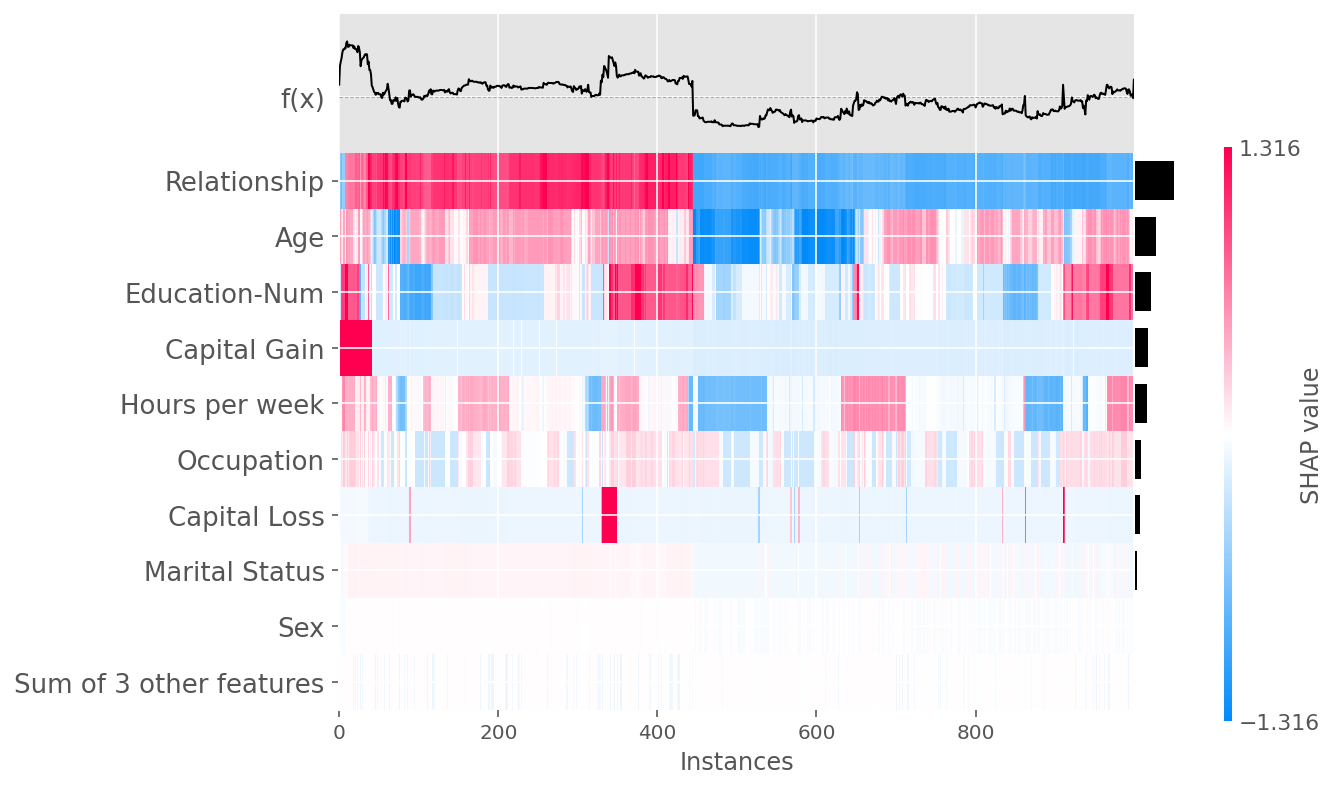

In [81]:
shap.plots.heatmap(shap_values[:1000])